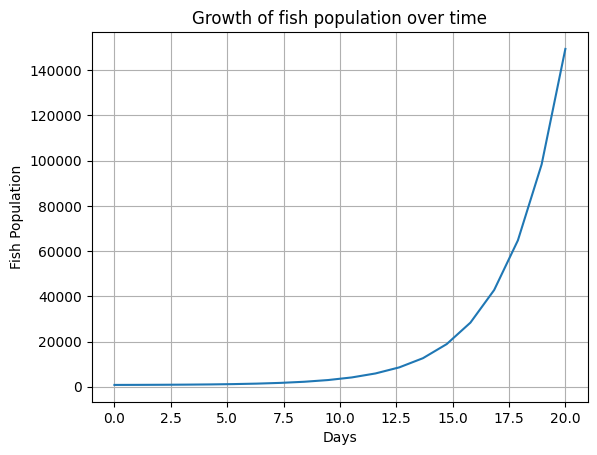

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

A = 0.7 # birth rate
B = 0.3 # death rate
H = 300 # harvesting rate


def model(t, state):
    f = state
    dfdt = A * f - B * f - 300
    return [dfdt]

time_span = (0, 20)
initial_condition = [800]
sol = solve_ivp(model, time_span, initial_condition, t_eval=np.linspace(0, 20, 20))

t = sol.t
y = sol.y[0]

plt.xlabel("Days")
plt.ylabel("Fish Population")
plt.title("Growth of fish population over time")
plt.grid(True)
plt.plot(t, y)
plt.show()

0.0
0.1


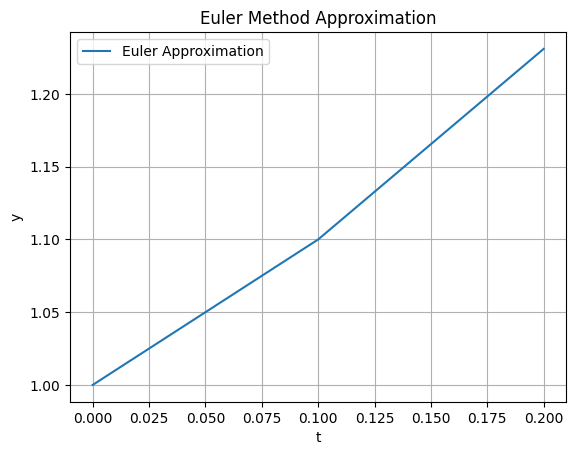

In [2]:
import numpy as np
import matplotlib.pyplot as plt 


def f(t, y):
    return y**2 + t
def euler_method(f, t0, y0, tn, h):
    n = int((tn - t0)/h)

    t_values = np.linspace(t0, tn, n + 1)
    y_values = np.zeros(n + 1)

    y_values[0] = 1
    t_values[0] = 0
    for i in range(n):
        y_values[i+1] = y_values[i] + h * f(t_values[i], y_values[i])
        print(t_values[i])
    return t_values, y_values

t0 = 0   # Initial time
y0 = 1   # Initial value of y
t_end = .2  # End time
h = 0.1  # Step size

# Solve the equation
t_values, y_values = euler_method(f, t0, y0, t_end, h)
plt.plot(t_values, y_values, label='Euler Approximation')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler Method Approximation')
plt.legend()
plt.grid(True)
plt.show()

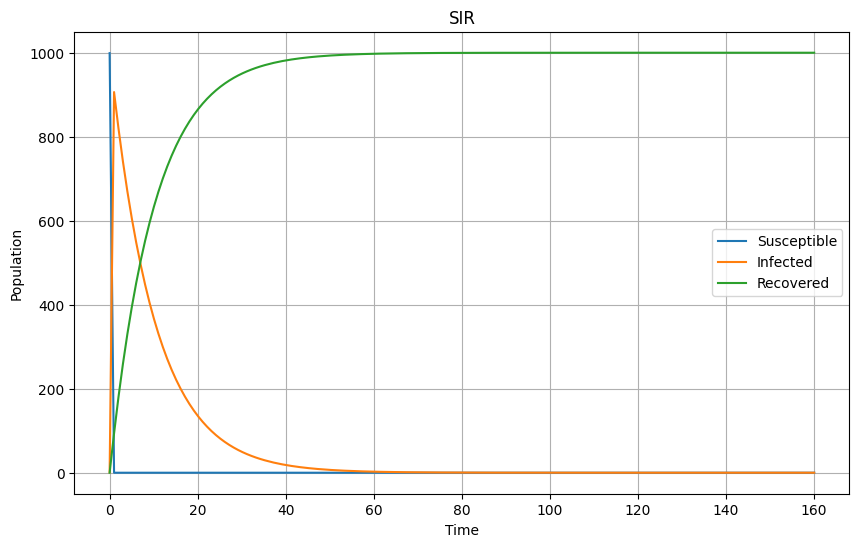

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def sir_model(y, t, B, C):
    S, I, R = y
    dSdt = -B*S*I
    dIdt = B*S*I - C*I
    dRdt = C*I
    return dSdt, dIdt, dRdt


B = .3
C = .1
N = 1000
I0 = 1
S0 = 999
R0 = 0
intial_con = (S0, I0, R0)


t = np.linspace(0, 160, 160)

solution = odeint(sir_model, intial_con, t, args=(B,C))
S, I, R = solution.T


plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Susceptible")
plt.plot(t, I, label="Infected")
plt.plot(t, R, label="Recovered")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("SIR")
plt.grid(True)
plt.show()

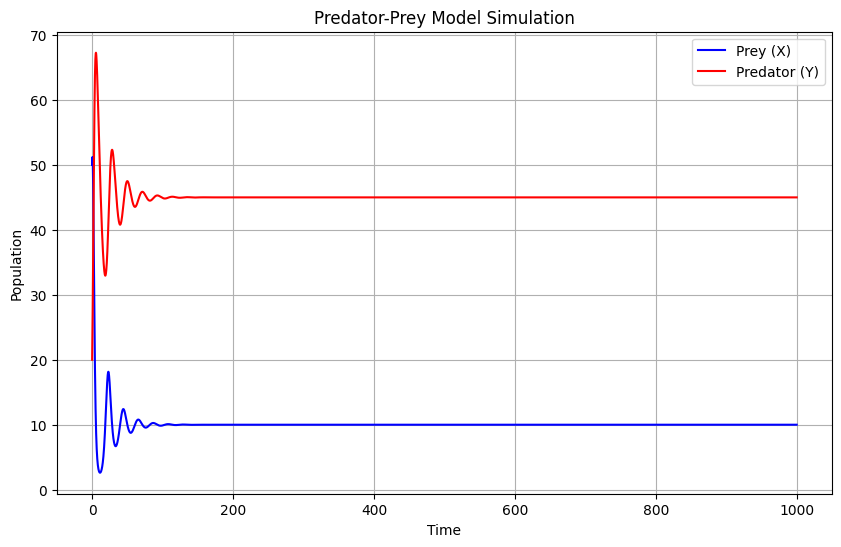

Final prey population: 10.00
Final predator population: 45.00


In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def predator_prey_model(state, t, R, K, B, C, D):
    X, Y = state
    dXdt = R * X * (1 - X / K) - B * X * Y
    dYdt = C * X * Y - D * Y
    return [dXdt, dYdt]

# Set parameters
R = 1.0  # Growth rate of prey
K = 100.0  # Carrying capacity of prey
B = 0.02  # Predation rate
C = 0.01  # Reproduction rate of predators per prey eaten
D = 0.1  # Death rate of predators

# Initial conditions
X0 = 50  # Initial prey population
Y0 = 20  # Initial predator population
initial_state = [X0, Y0]

# Time span
tspan = np.linspace(0, 1000, 10000)

# Solve ODE
solution = odeint(predator_prey_model, initial_state, tspan, args=(R, K, B, C, D))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(tspan, solution[:, 0], 'b', label='Prey (X)')
plt.plot(tspan, solution[:, 1], 'r', label='Predator (Y)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Model Simulation')
plt.legend()
plt.grid(True)
plt.show()

# Print final populations
print(f"Final prey population: {solution[-1, 0]:.2f}")
print(f"Final predator population: {solution[-1, 1]:.2f}")